# Earnings Return Prediction Challenge - Starter Template (for model)

In this project we will train a model to predict the stock return on the day of earnings for US companies. This template contains code to get you started with the project.
- This template focuses on model development and selection.

## Standard imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Notebook configuration
- Please set the **<span style="color:red">config['enddate']</span>** to the most recent Friday. Do not change any other config parameters. 

- The environment might take around one minute to load
- The  **Operators** are functions that can be used to apply a series of transformations to a data variable or alpha.
> [Introduction to Operators](https://trexsim.com/trexsim/pysim/tutorial2022/operators.html)
> 
> Find all available  operators in the [operators list](https://www.trexsim.com/trexsim/pysim/comptutorial/operators.html)

In [2]:
import operators as op              # find all available operators, https://www.trexsim.com/trexsim/pysim/comptutorial/operators.html
import utilities as utils
import strategy_utilities as sutil
from strategy_research import load_env

config = {
    'enddate': 20240802,            # Please setting the config['enddate'] to the most recent Friday.
    'region': 'USA',
    'universe': 'top3000',
    'delay': 0,
    'booksize':1e6,
    'refit_interval': 'OneQuarter',
    'filter_function_uuid': 'none',
    'fit_function_uuid': 'none',
    'pp_function_uuid': 'none',
    'tf_function_uuid': 'none',
    'postalpha': False,
    'compress': False,    
    'load_cache': False,
    'save_cache': False,
    'skip_post_strategy': True,
    'skip_test_cases': True,
    'strat_dir': './'
}

def tf_function(preA, data): return preA
function_dict = {'tf_function': tf_function}

env = load_env('USA')
data = sutil.create_strategy_data(function_dict, config, 'full', env, use_pre_compressed=True)
data = sutil.add_builtin_functions(data, function_dict, config, env)

is container True
Variable numdates is loaded from /home/newprod/production/data/USA/simvars/numdates/numdates.20240802.raw.mat
Variable numstocks is loaded from /home/newprod/production/data/USA/simvars/numstocks/numstocks.20240802.raw.mat
Variable dates is loaded from /home/newprod/production/data/USA/simvars/dates/dates.20240802.adj_amend.mat 4677
Variable numdates is loaded from /home/newprod/production/data/USA/simvars/numdates/numdates.20240802.adj_amend.mat 4677
Variable startdate is loaded from /home/newprod/production/data/USA/simvars/startdate/startdate.20240802.adj_amend.mat 4677
Variable enddate is loaded from /home/newprod/production/data/USA/simvars/enddate/enddate.20240802.adj_amend.mat 4677
Variable spread_timeweighted_allday is loaded from /home/newprod/production/data/USA/simvars/spread_timeweighted_allday/spread_timeweighted_allday.20240802.adj_amend.ci 4677
Variable numstocks is loaded from /home/newprod/production/data/USA/simvars/numstocks/numstocks.20240802.adj_a

## **Mask**

Most data variables at Trexquant are 2D matrices with dimensions _num\_stocks_ x _num\_dates_. We want to filter on the dates when earnings were announced and convert the 2D matrix to a vector so that it can be used in an ML model.

To find the earnings date we use the data variable [trading_days_til_next_ann](https://www.trexsim.com/trexsim/pysim/data_description/variable/USA/trading_days_til_next_ann/). We also require the time of announcement which we get from the data variable [fs_next_ann_time](https://www.trexsim.com/trexsim/pysim/data_description/variable/USA/fs_next_ann_time/). We use the following logic to construct the mask:
1. If the annoucement time is before the trading time (1500), set the earnings return day as today.
2. If the annoucement time is after the trading time (1500), set the earnings return day as the next day.

## **Target**

For this challenge we will use one-day forward ret1_excess as the target
- target columns: `target`, which is the forward [ret1_excess](https://www.trexsim.com/trexsim/pysim/data_description/variable/USA/ret1_excess/)
- dates: `dates` column is the masked dates, which is the day we want to enter our position before the earning announcement.
- stock index: `si`
- date index: `di`
- `[si,di]` data point indicates that we want to enter into the position for the stock at si th index and di th date just before the company announces its results

## **Features**

- Here we provide 87 features (all features submitted by the GAR team). 
- All features are already normalized, and their values range from `-4.0` to `4.0`

In [4]:
# load the dataframe
df_v87 = pd.read_csv('df_train_valid_f87_20240805.csv', index_col=0)

# name of all features
features_ls = [col for col in df_v87.columns if col not in ['target', 'si', 'di', 'dates']]
print(f"Num of features {len(features_ls)}\nCurrent features: {features_ls}")

Num of features 87
Current features: ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64', 'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73', 'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82', 'f_83', 'f_84', 'f_85', 'f_86', 'f_87']


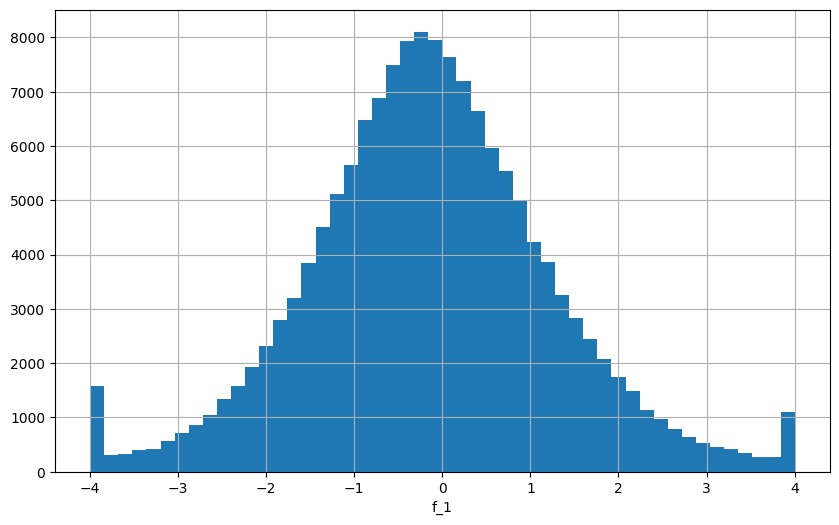

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def hist_show(df, fname):
    df_temp = df.copy()
    df_temp[fname] = df_temp[fname].replace(0.0, np.nan)
    df_temp[fname].hist(bins=50,figsize=(10, 6))
    plt.xlabel(fname)
    plt.show()   
    
hist_show(df_v87, 'f_1') # to check the feature's distribution

## **Post Processing (PP) function**
- PP function applies the final risk-management constraints on the signal and makes our signal tradeable in real markets
- PP function reduces the turnover and increases the liquidity which reduces the slippage costs

In [6]:
# PP function - No need to modify the code below

def post_processing(data, preA, booksize):
    lookback = 252
    
    apply_locates = data['apply_locates']
    preA1 = np.copy(preA)
    preA1 *= data['valids']
  
    postA = op.at_nan2zero(preA1)
    postA = op.ts_mean_exp(op.at_nan2zero(postA), 5, 2/5)
    
    postA = op.cs_poslimit(postA, 0.1)
    postA = op.cs_indneut(postA, data['sector'])
    postA = op.cs_shrink_balance(postA)                                            

    long_scaler = op.ts_max(np.nansum(postA*(postA>0),axis=0),lookback)            
    short_scaler = op.ts_max(np.nansum(np.abs(postA)*(postA<0),axis=0),lookback)   
    scaler = np.maximum(long_scaler,short_scaler)                                  
    postA = postA/scaler * booksize                                                
    
    postA = op.op_vmcont(postA, data['valids'], data['close'], data['vol20'],
                         maxtrd=0.05*(booksize/1e9), maxpos=0.5*(booksize/1e9))
    postA = op.tc_hump(postA, data['close'], hump_factor=1.0)                      
    postA = op.cs_shrink_balance(postA)                                            

    long_scaler = op.ts_max(np.nansum(postA*(postA>0),axis=0),lookback)
    short_scaler = op.ts_max(np.nansum(np.abs(postA)*(postA<0),axis=0),lookback)
    scaler = np.maximum(long_scaler,short_scaler)
    postA = postA/scaler * booksize

    postA = op.cs_poslimit(postA, 0.1)
    postA = op.cs_shrink_balance(postA)                                            
    postA = apply_locates(postA, data, data['locate_utilization_rate'], data['max_rebate_rate'])
    return postA

## **Training and validation**
- Training period: From 2006 to 2016 (11 years)
- Validation period: From 2017 to 2020 (4 years)

In [7]:
def train_valid_period(df_data,train_startdate,train_enddate,valid_startdate,valid_enddate):
    
    # split the df according to the periods of train/valid
    train_mask = (df_data['dates'] >= train_startdate) & (df_data['dates'] <= train_enddate)
    valid_mask = (df_data['dates'] >= valid_startdate) & (df_data['dates'] <= valid_enddate)
    
    df_train = df_data[train_mask]
    df_valid = df_data[valid_mask]
            
    X_train,Y_train = df_train[features_ls].to_numpy(),df_train['target'].to_numpy()
    X_valid,Y_valid = df_valid[features_ls].to_numpy(),df_valid['target'].to_numpy()
    
    train_si,train_di = df_train['si'].values, df_train['di'].values
    valid_si,valid_di = df_valid['si'].values, df_valid['di'].values

    return X_train,Y_train,X_valid,Y_valid, train_si,train_di, valid_si,valid_di

# Training and validation
train_startdate = 20060101
train_enddate = 20161231

valid_startdate = 20170101
valid_enddate = 20201231

X_train,Y_train,X_valid,Y_valid, train_si,train_di, valid_si,valid_di = train_valid_period(df_v87, train_startdate,train_enddate,valid_startdate,valid_enddate)

# **Modeling**

In [8]:
### ---- ---- ---- ---- Helper functions, No need to modify the code below ---- ---- ---- ---- ###

from tqdm.notebook import tqdm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from lightgbm import LGBMRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

def train_evaluate_model(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    YPRED_train = model.predict(X_train)
    YPRED_valid = model.predict(X_valid)
    acc_train = accuracy_score(Y_train >= 0, YPRED_train >= 0)
    acc_valid = accuracy_score(Y_valid >= 0, YPRED_valid >= 0)
    return model, acc_train, acc_valid, YPRED_train, YPRED_valid

def cal_simres(alpha,train_startdate,train_enddate,valid_startdate,valid_enddate):
    postA = post_processing(data,alpha,data['booksize'])
    postA[:, np.where(data['dates']>valid_enddate)[0][0]:]=np.nan # nan out values after valid_enddate
    simres = op.op_simulate(data,postA,0,liq_on_valid_days=True,calc_liqn=True,slippage=True, slippage_model='fraction_spread', fraction_spread=0.2)
    simres_train = op.cut_simres(simres,startdate=train_startdate,enddate=train_enddate)
    simres_valid = op.cut_simres(simres,startdate=valid_startdate,enddate=valid_enddate)
    return simres,simres_train,simres_valid

def highlight_rows(s, bm_indices):
    return ['background-color: lightyellow' if s.name in bm_indices else '' for _ in s]

Here, you can test all the models you think are meaningful, adjust the parameters you're interested in, and even construct your own models to test if they outperform the benchmark models.
Here, we provide several examples, which include:
- `GradientBoostingRegressor` models with different parameters,
- `LinearRegression` models,
- and a simple `Equal-Weight` model that we constructed.

In [9]:
# You can also build your own Model, e.g., Equal-Weight
class EqualWeight:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        n_features = X.shape[1]
        # self.weights = -np.ones(n_features) / n_features
        self.weights = np.ones(n_features) / n_features

    def predict(self, X):        
        weighted_sum = np.multiply(X, self.weights).sum(axis=1)
        return weighted_sum


### Models to compare
models = {
    'GradientBoostingRegressor_bm': GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=42), # Please always keep this one as the benchmark
    'GradientBoostingRegressor_n750': GradientBoostingRegressor(n_estimators=750, learning_rate=0.1, max_depth=2, random_state=42),
    'RidgeRegression': Ridge(fit_intercept=False, alpha=1.0),
    'EqualWeight': EqualWeight()
}

### **Simulation**

In [10]:
### ---- ---- ---- ---- Run simulation ---- ---- ---- ---- ###
from IPython.display import display, clear_output
import time

model_res = {}
model_simres = {}

for model_name, model in models.items():
    print(f">>> {model_name} running..")

    tic = time.time()
    trained_model,acc_train,acc_valid,YPRED_train,YPRED_valid = train_evaluate_model(model, X_train, Y_train, X_valid, Y_valid)
    alpha = np.full_like(data['ret1'], np.nan, dtype='float32', order='F')
    alpha[train_si, train_di],alpha[valid_si, valid_di] = YPRED_train,YPRED_valid
    simres,simres_train,simres_valid = cal_simres(alpha,train_startdate,train_enddate,valid_startdate,valid_enddate)
    toc = time.time()-tic
    
    metrics = ['ir','ret','tvr','dd','liqn']
    metrics_train = [acc_train*100]+[simres_train[mtc][-1] if isinstance(simres_train[mtc], np.ndarray) else simres_train[mtc] for mtc in metrics]
    metrics_valid = [acc_valid*100]+[simres_valid[mtc][-1] if isinstance(simres_valid[mtc], np.ndarray) else simres_valid[mtc] for mtc in metrics]
    mtc_colmns = ['acc_train']+[x+'_train' for x in metrics]+['acc_valid']+[x+'_valid' for x in metrics]+['runtime(sec)']
    mtc_values = metrics_train+metrics_valid+[toc]

    model_res[model_name] = mtc_values
    model_simres[model_name] = simres

    # Summary on the Metrics
    model_res_df = (pd.DataFrame(model_res, index=mtc_colmns).T).sort_values(by="ir_train", ascending=False)
    styled_df = model_res_df.style.apply(highlight_rows, bm_indices=['GradientBoostingRegressor_bm'], axis=1).highlight_max(color='lightgreen').format("{:.3f}")
    clear_output(wait=True)
    display(styled_df)

,acc_train,ir_train,ret_train,tvr_train,dd_train,liqn_train,acc_valid,ir_valid,ret_valid,tvr_valid,dd_valid,liqn_valid,runtime(sec)
GradientBoostingRegressor_n750,55.284,0.343,0.820,0.367,5.790,38.330,51.743,0.138,0.224,0.319,7.202,38.330,1148.269
GradientBoostingRegressor_bm,52.747,0.232,0.408,0.374,7.300,38.438,51.814,0.197,0.308,0.319,4.232,38.438,314.731
RidgeRegression,51.902,0.171,0.289,0.373,13.608,41.828,51.599,0.157,0.250,0.321,5.808,41.828,8.033
EqualWeight,50.291,-0.004,-0.006,0.386,51.746,38.471,49.934,0.024,0.035,0.332,26.349,38.471,7.470


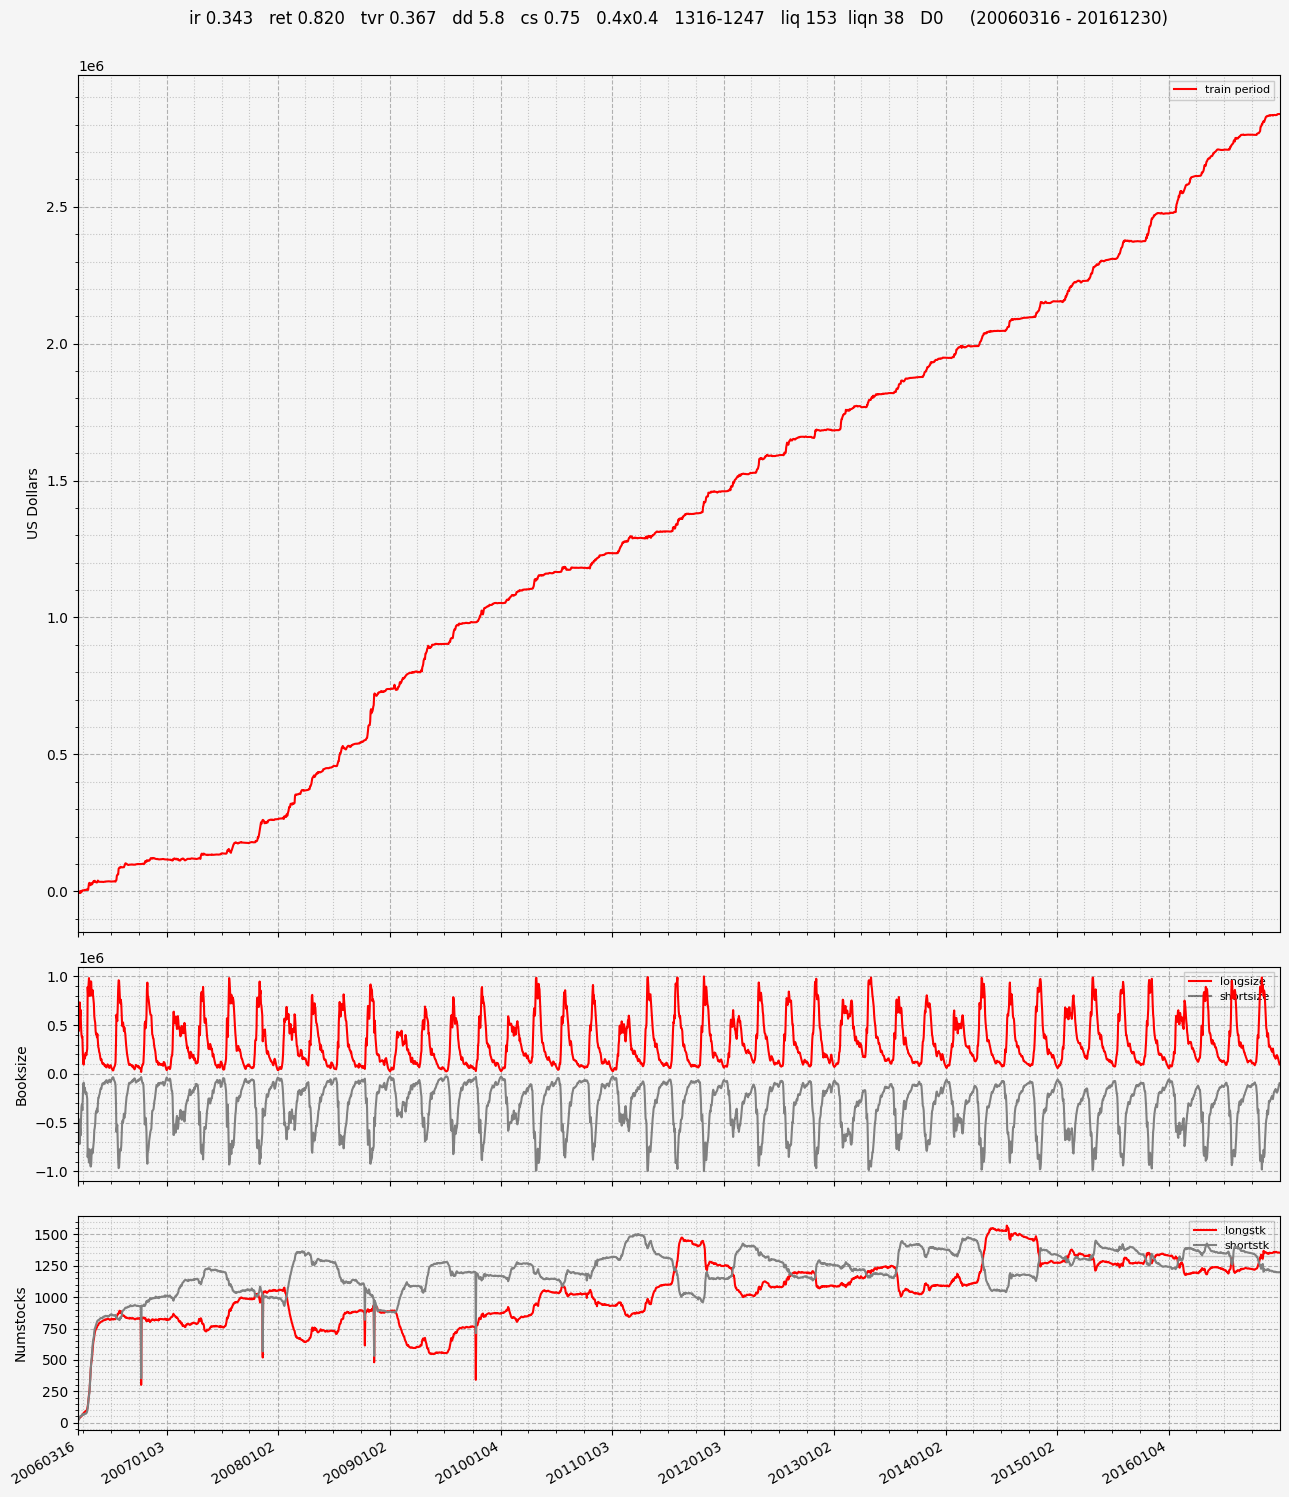

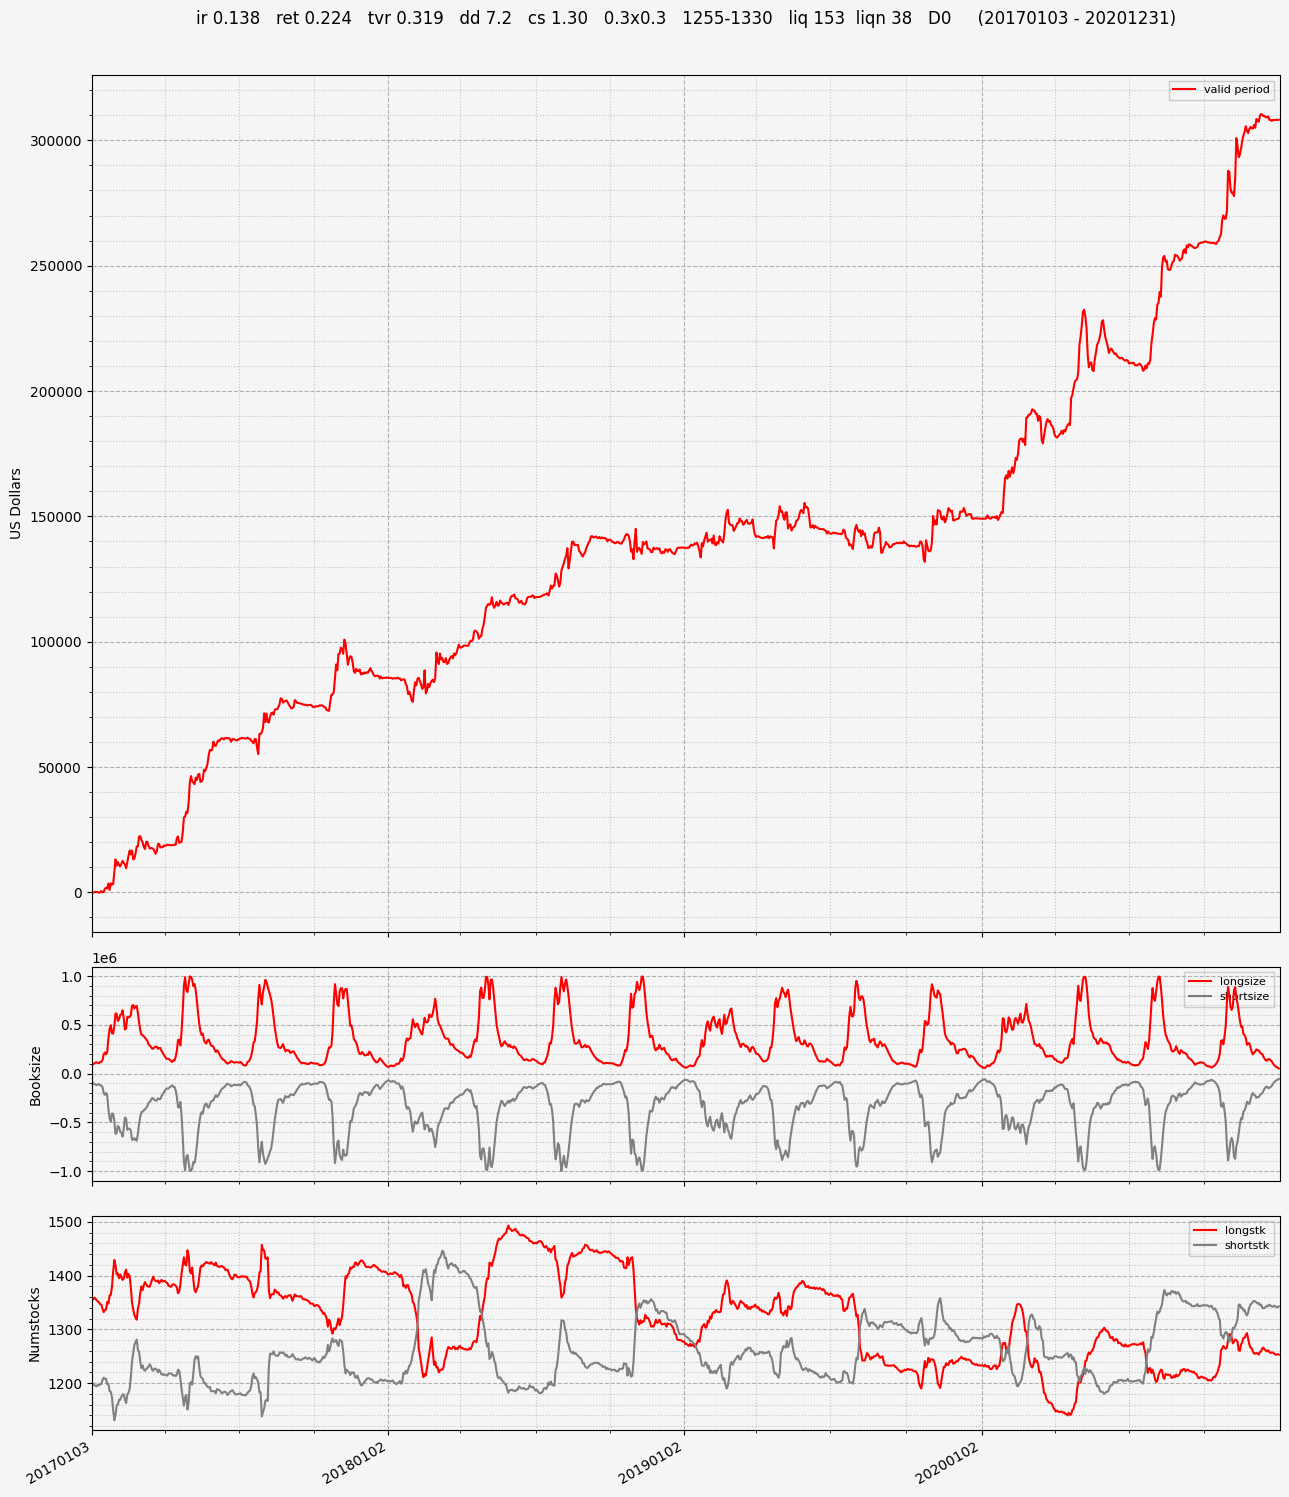

In [11]:
# check the PnL
current_model_name = 'GradientBoostingRegressor_n750'
simres = model_simres[current_model_name]

# simulation results
simres_train = op.cut_simres(simres,startdate=train_startdate,enddate=train_enddate)
simres_valid = op.cut_simres(simres,startdate=valid_startdate,enddate=valid_enddate)

# pnl plots
%matplotlib inline
op.op_plot(op.cut_simres(simres,startdate=train_startdate,enddate=train_enddate),label='train period')
op.op_plot(op.cut_simres(simres,startdate=valid_startdate,enddate=valid_enddate),label='valid period')

### **Model PnL Correlation**

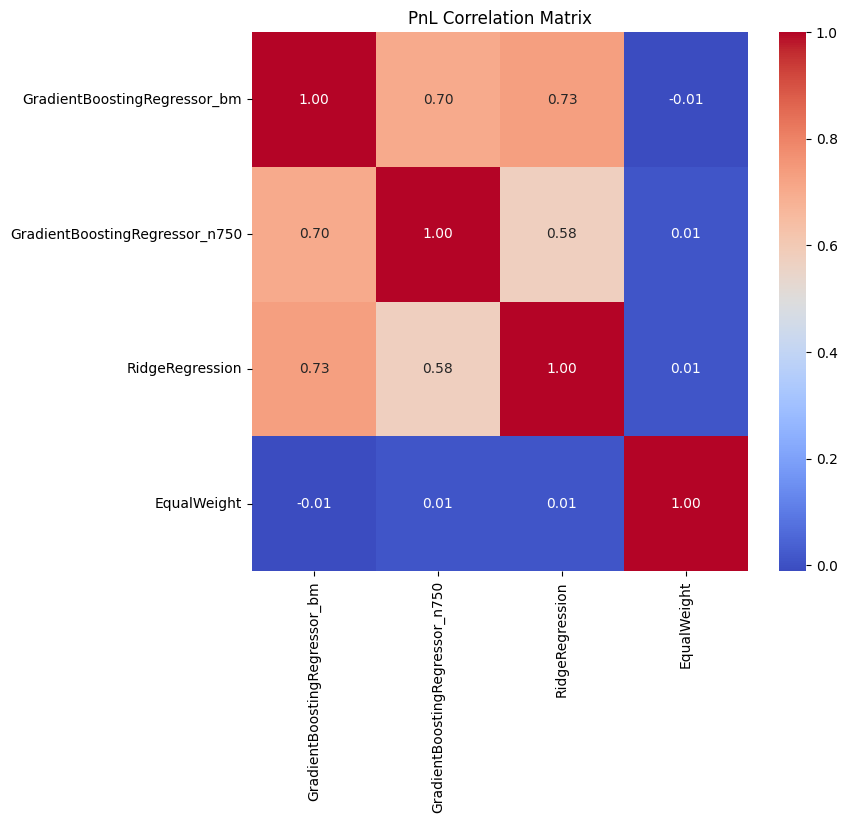

In [12]:
# PnL Correlation Matrix - training and validation
model_pnl = {}
for ms in model_simres:
    model_pnl[ms] = model_simres[ms]['dailypnl'][:np.where(data['dates']>=valid_enddate)[0][0]]
    
%matplotlib inline
plt.figure(figsize=(8, 7)) # adjust the figure size of the heatmap
correlation_matrix = pd.DataFrame(model_pnl).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PnL Correlation Matrix')
plt.show()